In [1]:
# load and summarize the housing dataset
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from seaborn import load_dataset

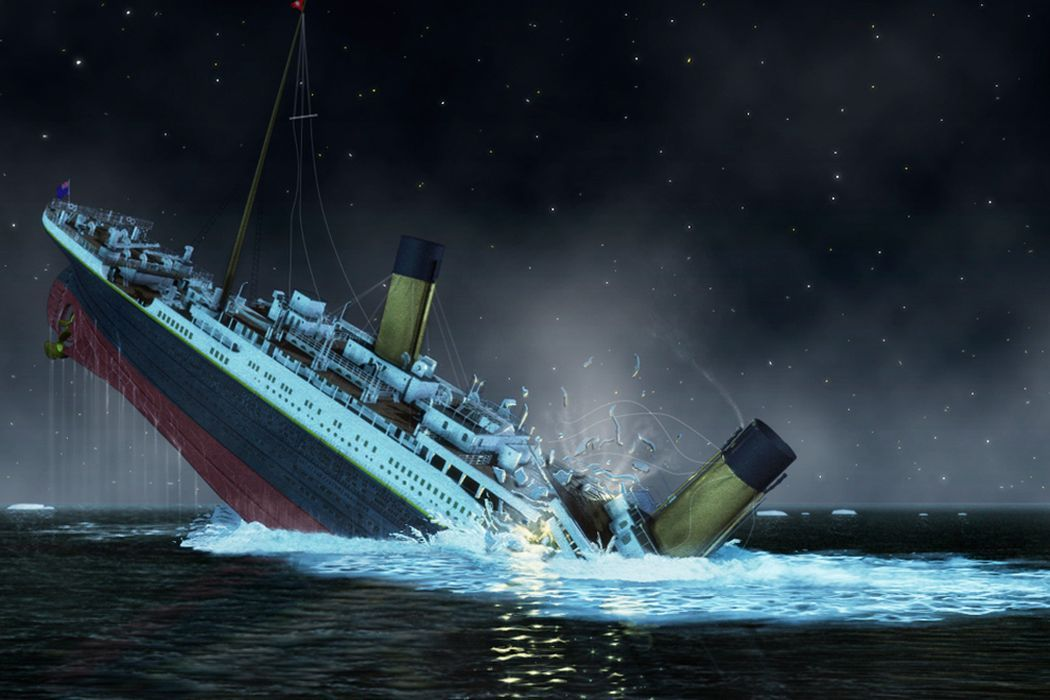

## Load Titanic data set

In [2]:
df = load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


PassengerId - מספר מזהה לנוסע

Survived - שרד

Pclass - מחלקה

Name - שם

Sex - מגדר

Age - גיל

SibSp - מספר קרובים שהם בני זוג או אחים ואחיות

Parch - מספר ילדים והורים

Ticket - מספר כרטיס

Fare - מחיר כרטיס

Cabin - תא באוניה

Embarked - נמל עליה לאוניה

## Box Plot


[Whisker](https://miro.medium.com/max/1032/1*USCc7cKa-8M0tfCPkFPZQg.png)![1_USCc7cKa-8M0tfCPkFPZQg[1].png](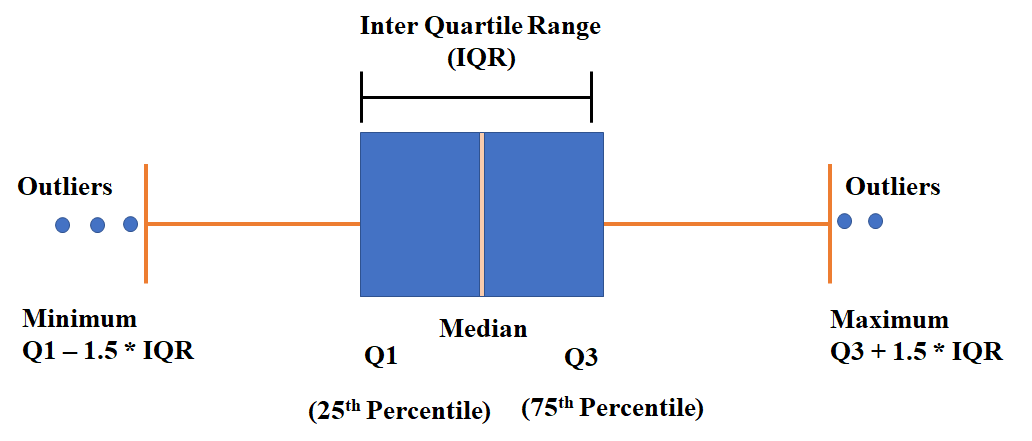)


In [3]:
df.corr()[['survived']].sort_values(by = 'survived' , ascending = False)

,survived
survived,1.000000
fare,0.257307
parch,0.081629
sibsp,-0.035322
age,-0.077221
alone,-0.203367
pclass,-0.338481
adult_male,-0.557080


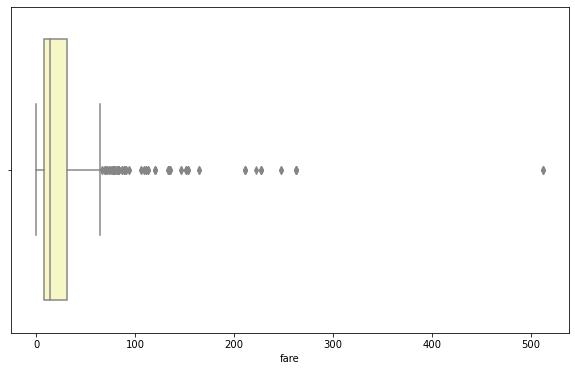

In [4]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df,x= 'fare',palette= 'Spectral')
plt.show()

## Fare statistics

In [5]:
q1 = np.quantile(df.fare,q=0.25)
q2 = np.quantile(df.fare,q=0.5)
q3 = np.quantile(df.fare,q=0.75)
IQR = q3 - q1
max = q3 + 1.5*(IQR)
min = q1 - 1.5*(IQR)

In [6]:
print('The q1 of Fare is:', str(q1))
print('The q2 of Fare is:', str(round(q2,2))) ## median
print('The q3 of Fare is:', str(q3))
print('The IQR value is:', str(IQR))
print('The Fare_min value is:',str(min), ',The Fare_max value is:',str(max))

The q1 of Fare is: 7.9104
The q2 of Fare is: 14.45
The q3 of Fare is: 31.0
The IQR value is: 23.0896
The Fare_min value is: -26.724 ,The Fare_max value is: 65.6344


## display Outliers

In [7]:
df[(df['fare']<min) | (df['fare']>max)].sort_values(by = ['fare'] , ascending = False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
369,1,1,female,24.0,0,0,69.3000,C,First,woman,False,B,Cherbourg,yes,True
641,1,1,female,24.0,0,0,69.3000,C,First,woman,False,B,Cherbourg,yes,True
151,1,1,female,22.0,1,0,66.6000,S,First,woman,False,C,Southampton,yes,False


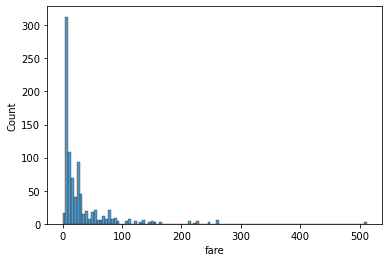

In [8]:
sns.histplot(data = df , x= 'fare' , bins = 'auto')

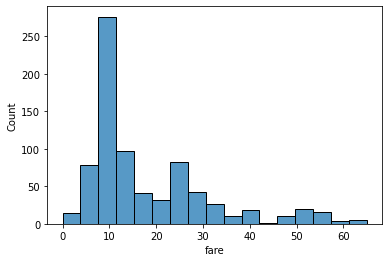

In [9]:
df_without_outliers = df[(df['fare']>=min) & (df['fare']<max)].reset_index(drop = True)
sns.histplot(data = df_without_outliers , x= 'fare' , bins = 'auto')

## Detect Outliers with Z_test

### Now let’s discover the outliers with mathematical functions.

We start with Z-score function defined in scipy library to detect the outliers.

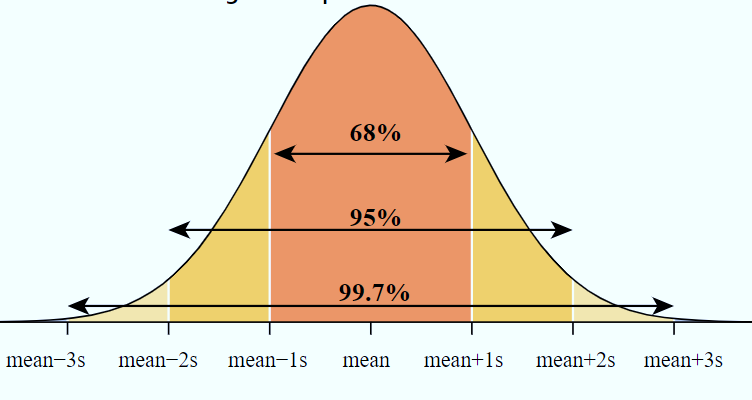

In [10]:
Fare_mean = np.mean(df['fare'])
Fare_std = np.std(df['fare'])
print ('The mean of fare is:' ,round(Fare_mean ,2))
print ('The standard deviation of fare is:' ,round(Fare_std,2)) 

The mean of fare is: 32.2
The standard deviation of fare is: 49.67


In [11]:
df['Fare_z_score'] = (df['fare'] - Fare_mean) / Fare_std
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Fare_z_score
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.502445
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.786845
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.488854
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.420730
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,-0.486337


In [12]:
df.query('Fare_z_score<3')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Fare_z_score
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.502445
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.786845
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.488854
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.420730
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,-0.386671
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,-0.044381
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,-0.176263
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,-0.044381


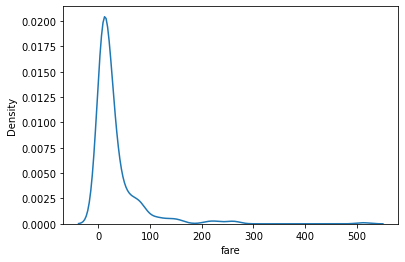

In [13]:
plt.figure(figsize = (6,4))
sns.kdeplot(data = df,x = 'fare',palette= 'Wistia')

In [14]:
df_without_outliers = df.query('Fare_z_score<3').reset_index(drop = True)
df_without_outliers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Fare_z_score
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.502445
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.786845
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.488854
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.420730
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,-0.486337


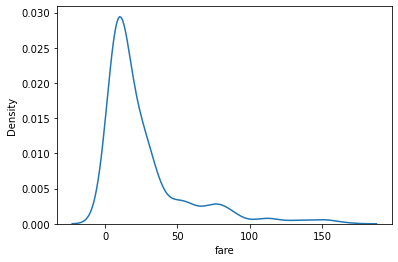

In [15]:
#sns.scatterplot(data = df_without_outliers,x = 'age',y= 'fare',hue = 'sex',palette= 'Spectral')
sns.kdeplot(data = df_without_outliers,x = 'fare',palette= 'Wistia')